# <center> Cross Validation <center>

# Introduction

As of now we have divided the input data into train and test datasets and use it for model training and testing respectively. This method is not very reliable as train and test data not always have same kind of variation like original data, which will affect the accuracy of the model. Cross validation solves this problem by dividing the input data into multiple groups instead of just two groups.


# Inner Working of Cross Validation

#### 1. Shuffle the dataset in order to remove any kind of order.
#### 2. Split the data into K number of folds. K= 5 or 10 will work for most of the cases.
#### 3. Now keep one fold for testing and remaining all the folds for training.
#### 4. Train(fit) the model on train set and test(evaluate) it on test set and note down the results for that split.
#### 5. Now repeat this process for all the folds, every time choosing separate fold as test data.
#### 6. So for every iteration our model gets trained and tested on different sets of data.
#### 7. At the end sum up the scores from each split and get the mean score.


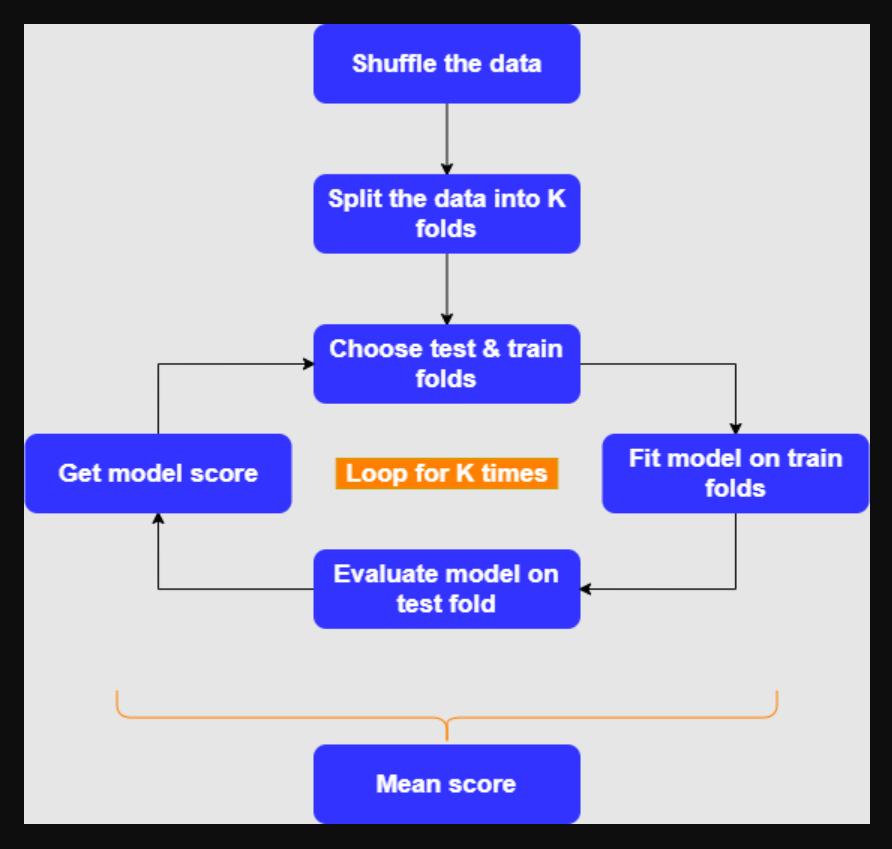



# K Fold Cross Validation <a id ="3"></a>

In case of K Fold cross validation input data is divided into 'K' number of folds, hence the name K Fold. Suppose we have divided data into 5 folds i.e. K=5. Now we have 5 sets of data to train and test our model. So the model will get trained and tested 5 times, but for every iteration we will use one fold as test data and rest all as training data. Note that for every iteration, data in training and test fold changes which adds to the effectiveness of this method. 

This significantly reduces underfitting as we are using most of the data for training(fitting), and also significantly reduces overfitting as most of the data is also being used in validation set. K Fold cross validation helps to generalize the machine learning model, which results in better predictions on unknown data.

For most of the cases 5 or 10 folds are sufficient but depending on problem you can split the data into any number of folds.


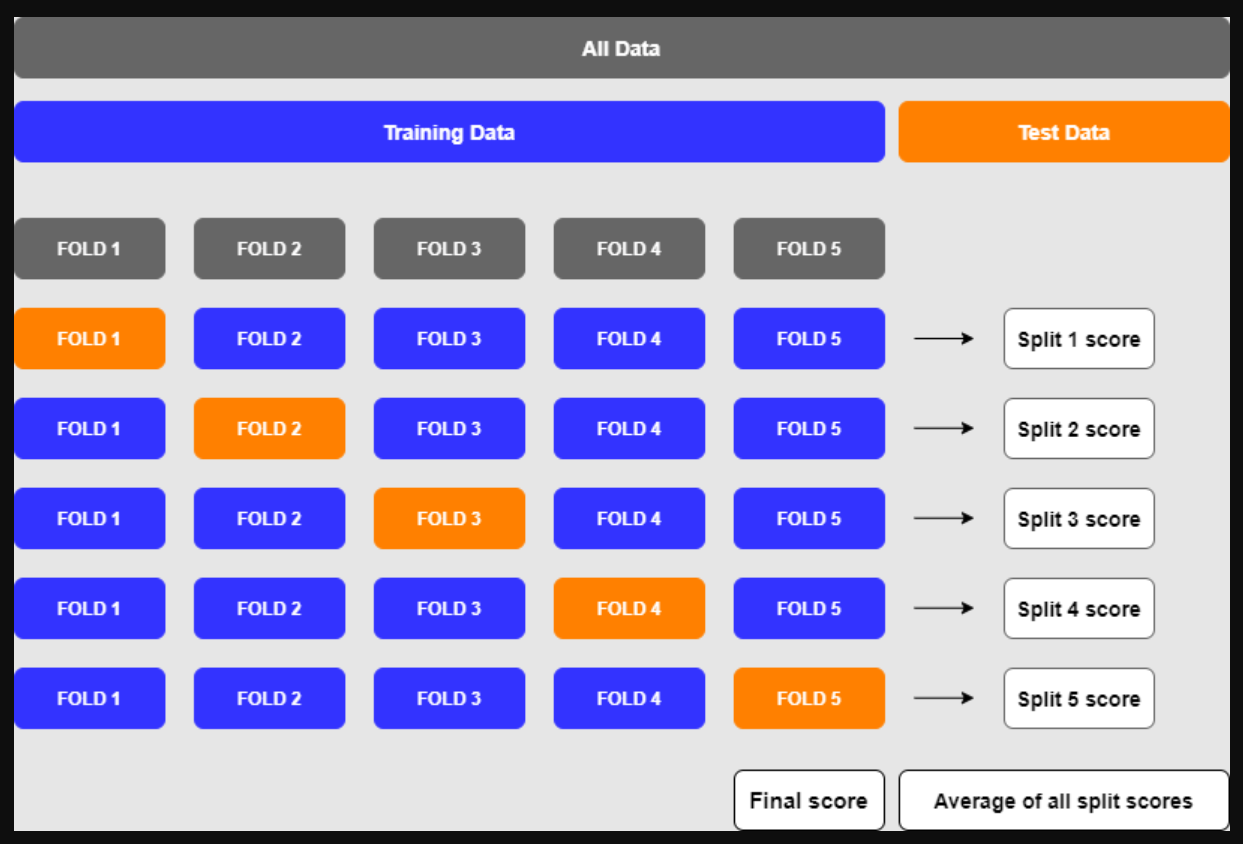





# Stratified K Fold Cross Validation <a id ="4"></a>

Stratified K Fold used when just random shuffling and splitting the data is not sufficient, and we want to have correct distribution of data in each fold. In case of regression problem folds are selected so that the mean response value is approximately equal in all the folds. In case of classification problem folds are selected to have same proportion of class labels. Stratified K Fold is more useful in case of classification problems, where it is very important to have same percentage of labels in every fold.


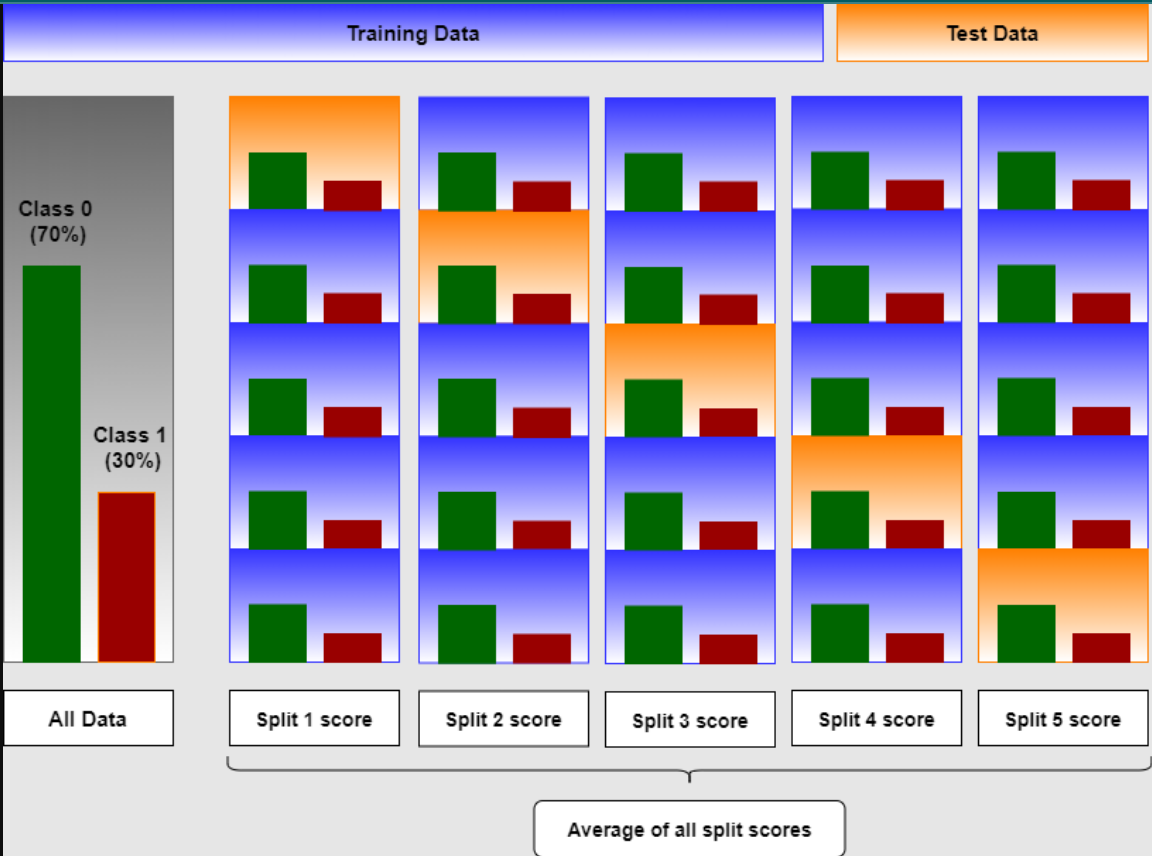

# Hyperparameter Tuning and Model Selection <a id ="5"></a>

Now you are familiar with inner working of cross validation, lets see how we can use it to tune the parameters and select best model. 

For hyperparameter tuning or to find the best model we have to run the model against multiple combination of parameters and features and record score for analysis. To do this we can use sklearns 'cross_val_score' function. This function evaluates a score by cross-validation, and depending on the scores we can finalize the hyperparameter which provides the best results. Similarly, we can try multiple model and choose the model which provides the best score.

Note: In this article I will do the model parameter tuning using for loop for better understanding. There are more sophisticated ways like using GridSearchCV() to do hyperparameter tuning.

# Advantages <a id ="6"></a>

* We end up using all the data for training and testing and this is very useful in case of small datasets
* It covers the variation of input data by validating the performance of the model on multiple folds
* Multiple folds also helps in case of unbalanced data
* Model performance analysis for every fold gives us more insights to fine tune the model 
* Used for hyperparameter tuning

# Disadvantages <a id ="7"></a>

* K Fold cross validation not really helpful in case time series data. 

# K Fold: Regression Example <a id ="8"></a>

We are going to use [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition data. We will convert this dataset into toy dataset so that we can straightaway jump into model building using K Fold cross validation

 
## Import Libraries <a id ="9"></a>

* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* KFold: Sklearn K-Folds cross-validator
* StratifiedKFold: Stratified K-Folds cross-validator
* cross_val_score: Sklearn library to evaluate a score by cross-validation
* linear_model: Sklearn library, we are using LinearRegression and LogisticRegression algorithm
* tree: Sklearn library, we are using DecisionTreeRegressor and DecisionTreeClassifier
* ensemble: SKlearn library, we are using RandomForestRegressor and RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

## Load Dataset <a id ="10"></a>
We will load the dataset into pandas dataframe and convert it into a toy dataset by removing categorical columns and rows and columns with null values.

In [2]:
train_data = pd.read_csv('CV/train.csv')

# Remove rows with missing target values
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = train_data.SalePrice # Target variable    

train_data.drop(['SalePrice'], axis=1, inplace=True) # Removing target variable from training data

train_data.drop(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1, inplace=True) # Remove columns with null values

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

print(X.head()) # Show first 5 training examples
 print(y.head())

FileNotFoundError: [Errno 2] No such file or directory: 'CV/train.csv'

In [ ]:
X.shape

(1460, 34)

## Understanding the Data <a id ="11"></a>
Final dataset contains 34 features and 1460 training examples. We have to predict the house sales price based on available training data.

## Model Score Using KFold <a id ="12"></a>
Let's use **cross_val_score()** to evaluate a score by cross-validation. We are going to use three different models for analysis. We will find the score for every split and then take average to get the overall score. We will analyze the model performance based on Root Mean Square Error (RMSE). Since RMSE is not directly available from scoring parameter, first we find the Mean Square Error and then take the square root of it.

In [ ]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1168, Test set:292
Fold:2, Train set: 1168, Test set:292
Fold:3, Train set: 1168, Test set:292
Fold:4, Train set: 1168, Test set:292
Fold:5, Train set: 1168, Test set:292


In [ ]:
"""
Why we are using '-' sign to calculate RMSE?
ANS: Classification accuracy is reward function, means something you want to maximize. Mean Square Error is loss function, 
means something you want to minimize. Now if we use 'cross_val_score' function then best score(high value) will give worst 
model in case of loss function! There are other sklearn functions which also depends on 'cross_val_score' to select best model by
looking for highest scores, so a design decision was made for 'cross_val_score' to negate the output of all loss function. 
So that when other sklearn function calls 'cross_val_score' those function can always assume that highest score indicate better model.
In short ignore the negative sign and rate the error based on its absolute value.
"""
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

### Using Linear Regression <a id ="13"></a>

In [ ]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-1.39334669e+09 -1.32533433e+09 -3.39493937e+09 -9.31045536e+08
 -7.16620849e+08]
rmse= 39398.70


### Using Decision Tree Regressor <a id ="14"></a>

In [ ]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-2.28396934e+09 -1.70193863e+09 -2.50505513e+09 -1.48547479e+09
 -1.66691378e+09]
rmse= 43916.63


### Using Random Forest Regressor <a id ="15"></a>

In [ ]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-8.58316418e+08 -6.13821216e+08 -2.06121160e+09 -7.97273029e+08
 -5.68429309e+08]
rmse= 31301.92


## Model Tuning using KFold <a id ="16"></a>
We can also use **cross_val_score()** along with KFold to evaluate the model for different hyperparameters. Here we are going to try different hyperparameter values and choose the ones for which we get the highest model score.

### Decision Tree Regressor Tuning <a id ="17"></a>

There are multiple hyperparameters like max_depth, min_samples_split, min_samples_leaf etc which affect the model performance. Here we are going to do tuning based on 'max_depth'. We will try with max depth starting from 1 to 10 and depending on the final 'rmse' score choose the value of max_depth.

In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 58803.64
For max depth: 2
rmse= 50060.31
For max depth: 3
rmse= 42152.85
For max depth: 4
rmse= 39218.54
For max depth: 5
rmse= 40185.90
For max depth: 6
rmse= 40522.15
For max depth: 7
rmse= 41089.08
For max depth: 8
rmse= 41161.27
For max depth: 9
rmse= 41441.94
For max depth: 10
rmse= 41758.39


### Random Forest Regressor Tuning <a id ="18"></a>

There are multiple hyperparameters like n_estimators, max_depth, min_samples_split etc which affect the model performance. Here we are going to do tuning based on 'n_estimators'. We will try with estimators starting from 50 to 350 and depending on the final 'rmse' score choose the value of estimator.

In [ ]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 31450.86
For estimators: 100
rmse= 31301.92
For estimators: 150
rmse= 31187.45
For estimators: 200
rmse= 31176.16
For estimators: 250
rmse= 31246.61
For estimators: 300
rmse= 31242.74
For estimators: 350
rmse= 31313.74


# K Fold: Classification Example <a id ="19"></a>

We are going to use [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition data. We will convert this dataset into toy dataset so that we can straightaway jump into model building using K Fold cross validation


## Load Dataset <a id ="20"></a>

We will load the dataset into pandas dataframe and convert it into a toy dataset by removing categorical columns and rows and columns with null values.

In [ ]:
train_data = pd.read_csv('CV/titanic/train.csv')

# Remove rows with missing target values
train_data.dropna(axis=0, subset=['Survived'], inplace=True)
y = train_data.Survived # Target variable             
train_data.drop(['Survived'], axis=1, inplace=True) # Removing target variable from training data

train_data.drop(['Age'], axis=1, inplace=True) # Remove columns with null values

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()

print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))
pd.concat([X, y], axis=1).head() # Show first 5 training examples

Shape of input data: (891, 5) and shape of target variable: (891,)


,PassengerId,Pclass,SibSp,Parch,Fare,Survived
0,1,3,1,0,7.2500,0
1,2,1,1,0,71.2833,1
2,3,3,0,0,7.9250,1
3,4,1,1,0,53.1000,1
4,5,3,0,0,8.0500,0


## Understanding the Data <a id ="21"></a>
Final dataset contains 5 features and 891 training examples. We have to predict which passengers survived the Titanic shipwreck based on available training data. Features that we are going to use in this example are passenger id, ticket class, sibling/spouse aboard, parent/children aboard and ticket fare

## Model Score Using KFold <a id ="22"></a>

Let's use **cross_val_score()** to evaluate a score by cross-validation. We are going to use three different models for analysis. We are going to find the score for every fold and then take average to get the overall score. We will analyze the model performance based on accuracy score, here score value indicate how many predictions are matching with actual values.

In [ ]:
# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

Fold:1, Train set: 712, Test set:179
Fold:2, Train set: 713, Test set:178
Fold:3, Train set: 713, Test set:178
Fold:4, Train set: 713, Test set:178
Fold:5, Train set: 713, Test set:178


## Using Logistic Regression <a id ="23"></a>

In [ ]:
score = cross_val_score(linear_model.LogisticRegression(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.66480447 0.69662921 0.70224719 0.69101124 0.66292135]
Average score: 0.68


## Using Decision Classifier <a id ="24"></a>

In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.67039106 0.61235955 0.5505618  0.64044944 0.69101124]
Average score: 0.63


## Using Random Forest Classifier <a id ="25"></a>

In [ ]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.74301676 0.66292135 0.65730337 0.70786517 0.73033708]
Average score: 0.70


## Model Tuning using KFold <a id ="26"></a>

We can also use **cross_val_score()** along with StratifiedKFold to evaluate the model for different hyperparameters. Here we are going to try different hyperparameter values and choose the ones for which we get the highest model score.

### Logistic Classifier Tuning <a id ="27"></a>

We will try different optimization algorithm to finalize the one with the highest accuracy.

In [ ]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(linear_model.LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')
    
# Note, here we are using max_iter = 4000, so that all the solver gets chance to converge. 

Average score(newton-cg): 0.684
Average score(lbfgs): 0.684
Average score(liblinear): 0.684
Average score(sag): 0.678
Average score(saga): 0.681


## Decision Tree Classifier Tuning <a id ="28"></a>

Here we are going to do tuning based on 'max_depth'. We will try with max depth starting from 1 to 10 and depending on the final 'accuracy' score choose the value of max_depth.

In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.668
Average score(2): 0.706
Average score(3): 0.713
Average score(4): 0.687
Average score(5): 0.688
Average score(6): 0.682
Average score(7): 0.669
Average score(8): 0.669
Average score(9): 0.663
Average score(10): 0.664


### Random Forest Classifier Tuning <a id ="29"></a>

Here we are going to do tuning based on 'n_estimators'. We will try with estimators starting from 50 to 350 and depending on the final 'rmse' score, choose the value of estimator.

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.703
Average score(100): 0.700
Average score(150): 0.691
Average score(200): 0.697
Average score(250): 0.692
Average score(300): 0.695
Average score(350): 0.700
